# VGG16 for CDI


In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = VGG16(weights="imagenet", include_top=True)

img_path = "c:\\Users\\ondrej.finke\\GIT\\neural-intensity-map\\run.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

results = pd.DataFrame(decode_predictions(model.predict(x), top=5)[0], columns=["something", "Class", "Probability"])

## Show results

,Class,Probability
0,German_shepherd,0.366231
1,Australian_terrier,0.122825
2,briard,0.109008
3,chow,0.090610
4,Leonberg,0.046314


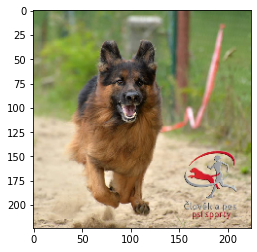

In [2]:
plt.imshow(img)
display(results.iloc[:,[1,2]])